# **Title:** Tutorial on Gender Detection using OpenCV

**Domain:** Computer Vision

**Group:** O

**Members:**     Pradnya Topale 2018130057
                 Soham Vaidya  2018130058

# **Introduction**

Due to the tremendous advancement in technology, there has been a lot of research in the field of facial analysis. Obtaining information about a person with the help of an image of face is drawing attention. One of its key attributes is the prediction of gender from these facial images. It plays a crucial role in surveillance systems, marketing intelligence, medical and verification procedures, etc. In this tutorial, we have used a CNN model to train the Adience Benchmark Gender Classification dataset that contains 26,580 images.

![Image](https://learnopencv.com/wp-content/uploads/2019/02/age-gender-sample1.jpg)

**Problem Statement:**  An important application of Computer Vision is the prediction of gender and age of a person based on his/her facial image. This is possible with the help of various neural networks and algorithms. Through this tutorial, we aim to achieve this goal using a CNN model that can easily detect the gender of a human based on the input facial image with a considerable accuracy. 

Objectives:
1. Detect the faces.
2. Classify them into male and female.
3. Display the age in one of the 8 age groups.

# Import the necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #interact with the underlying OS 

In [2]:
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import cv2 # OpenCV library for image processing
from PIL import Image # Python Imaging Library, display a PIL Image

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model development and training for varied datasets
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense,Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.callbacks import ModelCheckpoint



# Load the dataset

We will read it using pandas.read csv function.

In [4]:
#load data
data = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t" )
data1 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
data2 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
data3 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t")
data4 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

Dataset used: Adience Benchmark Gender and Age Classification 

Link: [Adience](https://www.kaggle.com/datasets/ttungl/adience-benchmark-gender-and-age-classification)

The Adience dataset, published in 2014, contains **26,580** photos across 2,284 subjects with a binary gender label and one label from eight different age groups, partitioned into five splits. The key principle of the data set is to capture the images as close to real world conditions as possible, including all variations in appearance, pose, lighting condition and image quality, to name a few.

It has 5 files each with the following columns -
1. user_id
2. original image
3. face_id
4. age
5. gender
6. x
7. y
8. dx
9. dy
10. tilt_angle
11. fiducial_yaw_angle
12. fiducial_score

# Analyzing the dataset

In [5]:
data.shape # give dimensions of the array
total_shape = (data.shape[0]+data1.shape[0]+data2.shape[0]+data3.shape[0]+data4.shape[0],data.shape[1])
print(data4.shape)
print(total_shape)

(3816, 12)
(19370, 12)


In [6]:
data.columns # print the column names

Index(['user_id', 'original_image', 'face_id', 'age', 'gender', 'x', 'y', 'dx',
       'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'],
      dtype='object')

In [7]:
data.dtypes # print the data type of each column

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

In [8]:
data.describe() #calculates and prints statistical data like the count, mean, percentile, std deviation, etc.

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,1468.835461,919.112014,681.773360,560.560360,560.628265,-9.334010,2.398433,72.891759
std,106.210585,645.883499,434.358154,358.399365,357.300076,74.863682,14.445252,37.003019
min,1322.000000,0.000000,0.000000,80.000000,80.000000,-190.000000,-45.000000,5.000000
25%,1388.000000,465.250000,331.000000,312.000000,312.000000,-80.000000,0.000000,45.000000
50%,1451.500000,808.500000,648.000000,466.000000,472.000000,-5.000000,0.000000,71.000000
75%,1538.000000,1300.000000,976.000000,691.250000,694.000000,5.000000,0.000000,97.000000
max,1743.000000,8721.000000,2226.000000,3130.000000,3104.000000,365.000000,45.000000,210.000000


In [9]:
data.head(10) # print first 10 rows of the dataset

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55
5,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1327,"(25, 32)",f,1294,752,1013,1013,-10,30,110
6,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1325,"(25, 32)",f,798,583,943,943,-10,15,57
7,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1328,"(25, 32)",f,2632,1069,243,242,15,15,23
8,113445054@N07,11763616596_db19dbce85_o.jpg,1329,34,m,803,854,612,612,5,0,20
9,113445054@N07,11763616596_db19dbce85_o.jpg,1325,"(25, 32)",f,1141,1282,503,504,5,0,72


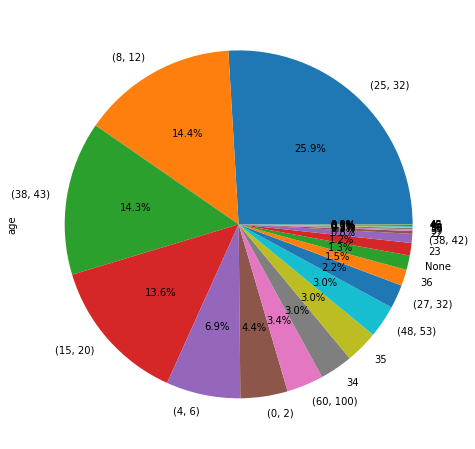

In [10]:
#pie_graph
plt.figure(1, figsize=(8,8))
data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The pie graph shows the distribution of age. It can be seen that majority of the people belong to the (25-32) age group. There is also a marginal difference between the people belonging to the age groups of (8-12) and (38-43).The pie graph shows the distribution of age across the dataset. It can be seen that majority of the people belong to the (25-32) age group followed by (0-2). Excluding the (25-32) age group, it can be observed that the consequetive 4 age groups of (0-20, (38-43), (4-6) and (8-12) do not have a huge difference between their respective counts.

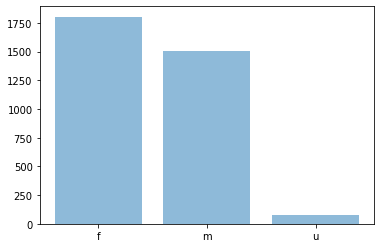

In [11]:
#bar chart
gender = ['f','m','u']
plt.bar(gender,data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

A bar graph is plotted to study the distribution of genders. It is divided into 3 genders: Male (m), Female (f) and Unknown(u). The highest number is of the female gender that is a little above the 1750 followed by the male gender at around 1500.

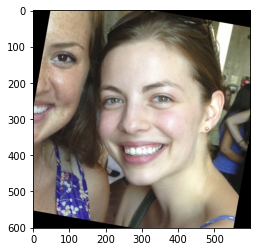

In [12]:
# path to the root directory of the dataset
path = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101071073@N04/coarse_tilt_aligned_face.708.10656436223_37c5dafe60_o.jpg"
img = load_img(path)
plt.imshow(img) # display data as image
plt.show() # display

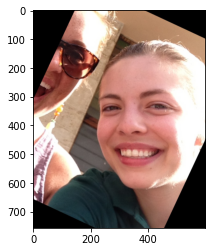

In [13]:
path2 = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101071073@N04/coarse_tilt_aligned_face.708.10658353233_02f5201237_o.jpg"
img = load_img(path2)
plt.imshow(img)
plt.show()

We have data from 5 different files, we need to add the data from all those files into single pandas dataframe and print the shape and info about it.

In [14]:
total_data = pd.concat([data, data1, data2, data3, data4], ignore_index=True) # merge the 5 data files
print(data.shape) # print dimensions 
print(total_data.shape)

(3446, 12)
(19370, 12)


In [15]:
total_data.info() # prints information like number of columns, its data types, non-null values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [16]:
total_data.head() # display first 5 rows

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55


In [17]:
# #pie_graph
# plt.figure(1, figsize=(8,8))
# total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
# plt.show()

The pie graph shows the distribution of age across the dataset. It can be seen that majority of the people belong to the (25-32) age group followed by (0-2). Excluding the (25-32) age group, it can be observed that the consequetive 4 age groups of (0-20, (38-43), (4-6) and (8-12) do not have a huge difference between their respective counts.

In [18]:
total_data.gender.value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

The total number of females is the highest at 9372 followed by the males and then unknowns. Therefore, the total number of genders present is 18,591.

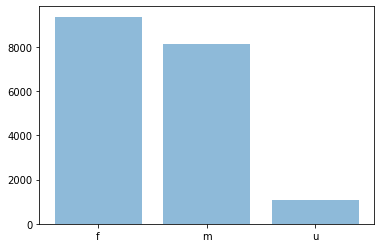

In [19]:
#bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

For visualization of the above counts, a bar graph is plotted wherein their total counts can be seen in the form of bars.

# Step 4: Use relevant data and map them

Out of 12 columns, in the below code, we're taking only the 6 required columns - age, gender, position and bounding box and displaying information about them.

In [20]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


Image path is displayed along with these 6 columns. 

A relative link for these images is created and stored in drive. It is also added to our dataframe.

In [21]:
img_path = []
for row in total_data.iterrows():
    path = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

df['img_path'] = img_path

In [22]:
pd.set_option('display.max_colwidth',500)

In [23]:
df.head() # print first 5 rows

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",m,1102,296,357,357,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1322.11763777465_11d01c34ce_o.jpg
1,"(25, 32)",f,1713,580,325,325,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1323.11763777465_11d01c34ce_o.jpg
2,"(15, 20)",f,1437,664,306,306,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1324.11763777465_11d01c34ce_o.jpg
3,"(25, 32)",f,978,229,803,803,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1325.11764005785_f21921aea6_o.jpg
4,"(25, 32)",m,1745,910,242,242,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1326.11763728674_a41d99f71e_o.jpg


In [24]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'),
               ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), 
               ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'),
               ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'),
               ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'),
               ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'),
               ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]

df = df.drop(labels=drop_labels, axis=0) #dropped None values
df.age.value_counts(dropna=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In this, the records that do not have a known gender associated with them are dropped and the stats for the remaining data are printed. The records that have unknown gender will be dropped as well because we cannot use them to train our model.

In [25]:
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
unbiased_data.info() # print information after dropping unknown gender

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


Map the gender to class labels 0 and 1. Here, female gender is assigned the label 0 and male gender is assigned the label 1.

In [26]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

age_to_label_map = {
    '0-2'  :'0',
    '4-6'  :'1',
    '8-13' :'2',
    '15-20':'3',
    '25-32':'4',
    '38-43':'5',
    '48-53':'6',
    '60+'  :'7'
}

Again, the first 5 records are printed to check the integrity of the data

Mapping for the gender class

In [27]:
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])
unbiased_data['age'] = unbiased_data['age'].apply(lambda g: age_to_label_map[g])

unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,1,1102,296,357,357,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1322.11763777465_11d01c34ce_o.jpg
1,4,0,1713,580,325,325,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1323.11763777465_11d01c34ce_o.jpg
2,3,0,1437,664,306,306,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1324.11763777465_11d01c34ce_o.jpg
3,4,0,978,229,803,803,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1325.11764005785_f21921aea6_o.jpg
4,4,1,1745,910,242,242,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1326.11763728674_a41d99f71e_o.jpg


Reseting the index according to the dataframe

In [28]:
unbiased_data.reset_index(drop=True)

,age,gender,x,y,dx,dy,img_path
0,4,1,1102,296,357,357,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1322.11763777465_11d01c34ce_o.jpg
1,4,0,1713,580,325,325,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1323.11763777465_11d01c34ce_o.jpg
2,3,0,1437,664,306,306,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1324.11763777465_11d01c34ce_o.jpg
3,4,0,978,229,803,803,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1325.11764005785_f21921aea6_o.jpg
4,4,1,1745,910,242,242,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/113445054@N07/coarse_tilt_aligned_face.1326.11763728674_a41d99f71e_o.jpg
...,...,...,...,...,...,...,...
17447,4,0,718,748,492,492,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101515718@N03/coarse_tilt_aligned_face.2280.10587826073_6663f5b654_o.jpg
17448,4,1,48,472,768,768,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101515718@N03/coarse_tilt_aligned_face.2278.10587571495_a61785cd06_o.jpg
17449,4,0,950,0,692,687,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101515718@N03/coarse_tilt_aligned_face.2279.10587571495_a61785cd06_o.jpg
17450,4,0,831,895,899,899,/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/50458575@N08/coarse_tilt_aligned_face.2281.9426695459_9e8b347604_o.jpg


In [29]:
unbiased_data['age'].value_counts()

4    5240
5    2776
2    2285
1    2139
3    1790
0    1418
6     909
7     895
Name: age, dtype: int64

## Train Test Split
Create training and test datasets with sklearn train test split method. 
The most common split ratio 80:20 that is 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set is used for our model.

The random state is simply sets a seed to the random generator so that the train-test splits are always deterministic. If  a seed is not set, a different value would be generated each time. In our case, it is chosen to be 42.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(unbiased_data, test_size=0.2)
# X_train = X_train[:100]
# X_test = X_test[100:140]

## Generating images for training new layers
For gender model, the images are resized to 224,224 and then are converted to tuple of images using image data generator. After that, they are added to the test and train dataset. Since our dataset is large, this process takes some time.ImageDataGenerator is the class used to load data and also apply any augmentation if needed all in one go
ImageDataGenerator has many attributes i.e flow_from_dataframe to get the file paths from data frame or flow_from_directory where in we provide the directory name from where we have to load data

Further these images would be used for running the new layers in transfer learning

In [31]:
## Shuffling dataframe

datagen = ImageDataGenerator(rescale=1./255)
batch_size=32

train_generator=datagen.flow_from_dataframe(dataframe=X_train,directory=None,x_col='img_path',
                                            class_mode=None,batch_size=batch_size,
                                            target_size=(224,224),shuffle=False)


test_generator = datagen.flow_from_dataframe(dataframe=X_test,directory=None,x_col='img_path',
                                                class_mode=None,batch_size=batch_size,
                                                target_size=(224,224),shuffle=False)

Found 13961 validated image filenames.
Found 3491 validated image filenames.


# Step 6: Build the model

The VGG16 is formed by block of CNN joined together in effiecnt manner. since they are building blocks we define our CNN model here. We are using a sequential model i.e. data will travel sequentially from one layer to another without any jumps and splits. We are using the 'Relu' Activation function and have set dropout rate as 0.25.

**Conv2D** is the convolutional layer that specifies the expected shape of the input images in terms of rows (height), columns (width), and channels (depth) or [rows, columns, channels]. A few concepts related to it are explained in brief -

**filters** - Contains the weights that must be learned during the training of the layer. The filter weights represent the structure or feature that the filter will detect and the strength of the activation indicates the degree to which the feature was detected.

**strides** -The amount of movement between applications of the filter to the input image is referred to as the stride, and it is almost always symmetrical in height and width dimensions.
The default stride or strides in two dimensions is (1,1) for the height and the width movement, performed when needed and this default works well in most cases.

**kernel size** - Different sized filters will detect different sized features in the input image and, in turn, will result in differently sized feature maps.

**padding** - The addition of pixels to the edge of the image is called padding. In Keras, this is specified via the “padding” argument on the Conv2D layer, which has the default value of ‘valid‘ (no padding). This means that the filter is applied only to valid ways to the input.
The ‘padding‘ value of ‘same‘ calculates and adds the padding required to the input image (or feature map) to ensure that the output has the same shape as the input.

**Source:** MachineLearningMastery.com


The **ReLU** function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.

f(x0 = max(0, x)

![ReLu](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/10/17160725/relu-300x300.png)

For the negative input values, the result is zero, that means the neuron does not get activated. Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh function.

**Source:** AnalyticsVidhya.com

## VGG16
Using Vgg16 pre-trained network and then fine tuning the top layers of pre-trained network
Below image shows the architecture of VGG16

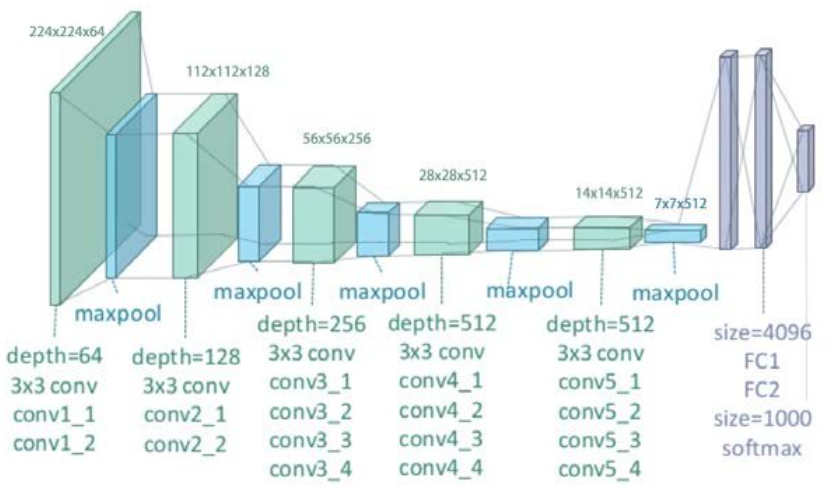
Pretrained network means we will use the weights which are provided by-default by imagenet .Since it was trained on Imagenet which has lots of classes using default weights will speed up the training process.Because the earlier layers of any CNN model recognizes basic features like edges,curves,etc then further layers combines them to make object like shape such as box,rectangle,circle,etc . Only the deeper layers are more specific to what we are building.

Since Deeper layers are specific to our problem we will fine-tune them that means we will freeze the earlier layers and only train the last Conv layer of vgg and the FC layer with very small weight updates.

For Fine Tuning we used the below keras blog as reference it explains fine tuning in depth:
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [33]:
vgg16_gender = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

for layers in vgg16_gender.layers:
    layers.trainable = False
    

## Looking at the model structure
vgg16_gender.summary()

2022-04-27 18:25:38.744977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 18:25:38.847758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 18:25:38.848868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 18:25:38.850859: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

Take layers from a previously trained model.
Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
Train the new layers on your dataset.

In [34]:
vgg16_age = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

for layers in vgg16_age.layers:
    layers.trainable = False
    

## Looking at the model structure
vgg16_age.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Here we get the bottle neck features buy training the model on images only and use these futher to find weights of the new layers

In [35]:
bottleneck_features_train_gender = vgg16_gender.predict(train_generator,verbose=1)
bottleneck_features_test_gender = vgg16_gender.predict(test_generator,verbose=1)
print(bottleneck_features_train_gender.shape,bottleneck_features_test_gender.shape)

2022-04-27 18:25:44.653506: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-27 18:25:46.085787: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


437/437 [==============================] - 174s 376ms/step


2022-04-27 18:28:38.361058: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1401014272 exceeds 10% of free system memory.


110/110 [==============================] - 41s 374ms/step
(13961, 7, 7, 512) (3491, 7, 7, 512)


The output shape of the bottleneck features is same as the last layer of the model i.e 7,7,512 the first dimension shows no of data
## Creating Fully Connected layer i.e Top Classifier Architecture and training it for stable weights

The reason for not going directly for fine tuning is , if we try to fine tune the Top Classifier with random weights initilzation our previously pretrained weights will get destroyed and it will lead to problem of Exploding Gradients , Hence it's better to first train the top-classifier for stable weights then fine tune at last with small learing rate and using Stochastic gradients or Rmsprop so that the magnitude of updates remain small so that our peviously learned weights do not get wrecked
Building the new layers for our problem statement

In [37]:
train_data_gender = bottleneck_features_train_gender.copy()
train_class_gender = X_train.loc[:,"gender"]

test_data_gender = bottleneck_features_test_gender.copy()
test_class_gender = X_test.loc[:,"gender"]

model_gender = Sequential()
model_gender.add(Flatten(input_shape=train_data_gender.shape[1:]))
model_gender.add(Dense(2048,activation='relu'))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(1,activation="sigmoid"))

model_gender.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# train_data_age = bottleneck_features_train_age.copy()
train_class_age = tf.keras.utils.to_categorical(X_train.loc[:,"age"])

# test_data_age = bottleneck_features_test_age.copy()
test_class_age = tf.keras.utils.to_categorical(X_test.loc[:,"age"])

model_age = Sequential()
model_age.add(Flatten(input_shape=train_data_gender.shape[1:]))
model_age.add(Dense(2048,activation='relu'))
model_age.add(Dropout(0.5))
model_age.add(Dense(8,activation="softmax"))

model_age.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
# Using checkpoints to save the best model where we are moniunbiased_datang validation accuracy 
# i.e we will save the model corresponding to max validation'accuracy 

filename = "./bottle_neck_best_wts_gender.hdf5"
checks = ModelCheckpoint(filename,monitor="val_accuracy",verbose=1,
                         save_best_only=True,mode="max",save_weights_only=True)

model_gender.fit(train_data_gender, train_class_gender,epochs=5,batch_size=32,validation_data=(test_data_gender, test_class_gender),callbacks=[checks])

2022-04-27 18:29:22.608737: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1401014272 exceeds 10% of free system memory.
2022-04-27 18:29:23.979605: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1401014272 exceeds 10% of free system memory.


Epoch 1/5
437/437 [==============================] - 4s 9ms/step - loss: 0.6523 - accuracy: 0.6592 - val_loss: 0.5491 - val_accuracy: 0.7104

Epoch 00001: val_accuracy improved from -inf to 0.71040, saving model to ./bottle_neck_best_wts_gender.hdf5
Epoch 2/5
437/437 [==============================] - 3s 7ms/step - loss: 0.5265 - accuracy: 0.7355 - val_loss: 0.4637 - val_accuracy: 0.7723

Epoch 00002: val_accuracy improved from 0.71040 to 0.77227, saving model to ./bottle_neck_best_wts_gender.hdf5
Epoch 3/5
437/437 [==============================] - 3s 8ms/step - loss: 0.4900 - accuracy: 0.7595 - val_loss: 0.4832 - val_accuracy: 0.7539

Epoch 00003: val_accuracy did not improve from 0.77227
Epoch 4/5
437/437 [==============================] - 3s 7ms/step - loss: 0.4568 - accuracy: 0.7770 - val_loss: 0.4074 - val_accuracy: 0.8132

Epoch 00004: val_accuracy improved from 0.77227 to 0.81323, saving model to ./bottle_neck_best_wts_gender.hdf5
Epoch 5/5
437/437 [============================

In [40]:
# Using checkpoints to save the best model where we are moniunbiased_datang validation accuracy 
# i.e we will save the model corresponding to max validation'accuracy 

filename = "./bottle_neck_best_wts_age.hdf5"
checks = ModelCheckpoint(filename,monitor="val_accuracy",verbose=1,
                         save_best_only=True,mode="max",save_weights_only=True)

model_age.fit(train_data_gender, train_class_age,epochs=5,batch_size=32,validation_data=(test_data_gender, test_class_age),callbacks=[checks])

2022-04-27 18:29:46.181786: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1401014272 exceeds 10% of free system memory.
2022-04-27 18:29:47.657656: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1401014272 exceeds 10% of free system memory.


Epoch 1/5
437/437 [==============================] - 4s 9ms/step - loss: 1.9243 - accuracy: 0.3093 - val_loss: 2.0154 - val_accuracy: 0.2151

Epoch 00001: val_accuracy improved from -inf to 0.21512, saving model to ./bottle_neck_best_wts_age.hdf5
Epoch 2/5
437/437 [==============================] - 3s 7ms/step - loss: 1.6668 - accuracy: 0.3651 - val_loss: 1.6032 - val_accuracy: 0.3856

Epoch 00002: val_accuracy improved from 0.21512 to 0.38556, saving model to ./bottle_neck_best_wts_age.hdf5
Epoch 3/5
437/437 [==============================] - 3s 7ms/step - loss: 1.5766 - accuracy: 0.3904 - val_loss: 1.5687 - val_accuracy: 0.4045

Epoch 00003: val_accuracy improved from 0.38556 to 0.40447, saving model to ./bottle_neck_best_wts_age.hdf5
Epoch 4/5
437/437 [==============================] - 3s 7ms/step - loss: 1.5349 - accuracy: 0.3981 - val_loss: 2.1691 - val_accuracy: 0.1518

Epoch 00004: val_accuracy did not improve from 0.40447
Epoch 5/5
437/437 [==============================] - 3s 

# Fine Tuning Last conv block of VGG with stable weights of TopClassifiers

Final Model = VGG(fine tune) + TopClassifier(stable wts)

Transfer learning is an optimization, a shortcut to saving time or getting better performance.

In general, it is not obvious that there will be a benefit to using transfer learning in the domain until after the model has been developed and evaluated.

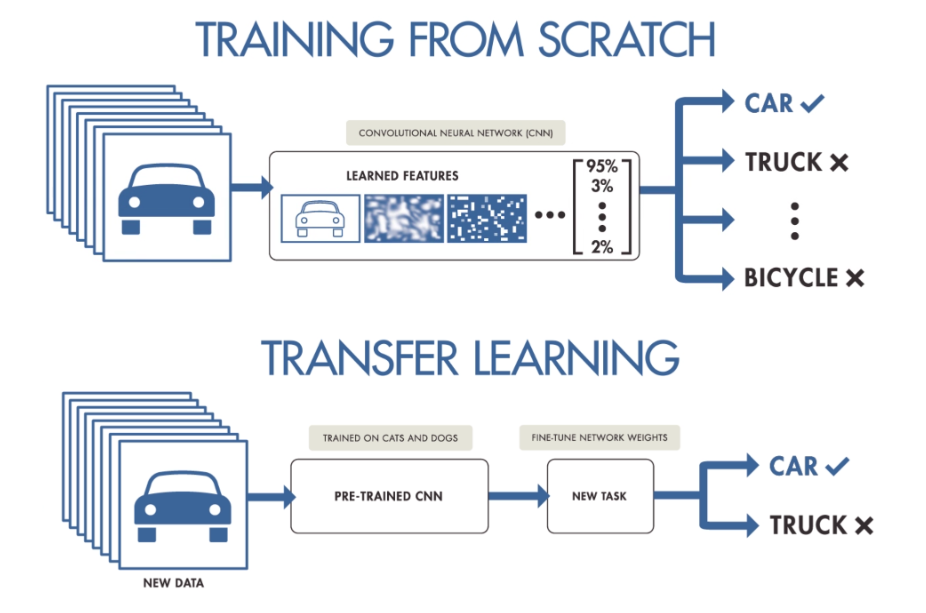

In [41]:
## After instantiating the VGG base and loading its weights, 

vgg_gender = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
for layer in vgg_gender.layers[:-4]:
    layer.trainable = False

## we add our previously trained fully-connected classifier on top of it
final_model_gender = Sequential()
final_model_gender.add(vgg_gender)


## Trained Classifier
top_model_gender = Sequential()
top_model_gender.add(Flatten(input_shape=final_model_gender.output_shape[1:]))
top_model_gender.add(Dense(2048,activation='relu'))
top_model_gender.add(Dropout(0.5))
top_model_gender.add(Dense(1,activation="sigmoid"))
top_model_gender.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049      
Total params: 51,384,321
Trainable params: 51,384,321
Non-trainable params: 0
_________________________________________________________________


In [42]:
## After instantiating the VGG base and loading its weights, 

vgg_age = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
for layer in vgg_age.layers[:-4]:
    layer.trainable = False

## we add our previously trained fully-connected classifier on top of it
final_model_age = Sequential()
final_model_age.add(vgg_age)


## Trained Classifier
top_model_age = Sequential()
top_model_age.add(Flatten(input_shape=final_model_age.output_shape[1:]))
top_model_age.add(Dense(2048,activation='relu'))
top_model_age.add(Dropout(0.5))
top_model_age.add(Dense(8,activation="softmax"))
top_model_age.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 16392     
Total params: 51,398,664
Trainable params: 51,398,664
Non-trainable params: 0
_________________________________________________________________


In [43]:
# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning

top_model_weights_path = "./bottle_neck_best_wts_gender.hdf5"
top_model_gender.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
final_model_gender.add(top_model_gender)
final_model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 51384321  
Total params: 66,099,009
Trainable params: 58,463,745
Non-trainable params: 7,635,264
_________________________________________________________________


In [44]:
# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning

top_model_weights_path = "./bottle_neck_best_wts_age.hdf5"
top_model_age.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
final_model_age.add(top_model_age)
final_model_age.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
sequential_5 (Sequential)    (None, 8)                 51398664  
Total params: 66,113,352
Trainable params: 58,478,088
Non-trainable params: 7,635,264
_________________________________________________________________


Compiling the model with a SGD/momentum optimizer with a very slow learning rate.

In [45]:
final_model_gender.compile(loss='binary_crossentropy',
              optimizer='sgd', #optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [46]:
final_model_age.compile(loss='categorical_crossentropy',
              optimizer='sgd', #optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

Data generator function for creating input images and labels

### Now for final training we used data augmentation techniques
Data Augmentation :- In normal terms we take a single image and apply some transformations/edit them to create new images this will help us to create more data and to significantly increase the diversity of data available for training models, without actually collecting new data.

### Augmentations Used
Flipping the image horizontally
zooming randomly
shear_range : Shear Intensity (Shear angle in counter-clockwise direction in degrees)

## Image Data Generator with augmentation

In [47]:
def return_data_generators(img_width,img_height,X_train,X_test,y_column,batch_size=32,class_mode="binary"):
    """
    img_width,img_height : - image dimension to be resized to this sizes during data loading
    
    returns ImageDatagenerators for training and testing purpose
    
    """
    df_len = len(X_train)
    val_split = int(0.8 * df_len) 
    
    
#     train_labels = train_labels.sample(frac=1).reset_index()

    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)


#     img_dir = "../input/jantahackcomputervision/train_SOaYf6m/images"


    train_generator = train_datagen.flow_from_dataframe(dataframe=X_train[:val_split],directory=None,x_col='img_path',
                                            y_col=y_column,class_mode=class_mode,batch_size=batch_size,
                                            target_size=(224,224),shuffle=False)

    validation_generator = train_datagen.flow_from_dataframe(dataframe=X_train[val_split:],directory=None,x_col='img_path',
                                            y_col=y_column,class_mode=class_mode,batch_size=batch_size,
                                            target_size=(224,224),shuffle=False)
    
    test_generator = test_datagen.flow_from_dataframe(dataframe=X_test,directory=None,x_col='img_path',
                                                y_col=y_column,class_mode=class_mode,batch_size=batch_size,
                                                target_size=(224,224),shuffle=False)
    
    return train_generator,validation_generator,test_generator

In [48]:
import gc
gc.collect()

2901

In [49]:
train_generator_gender,validation_generator_gender,test_generator_gender = return_data_generators(224,224,X_train,X_test,'gender',batch_size=32,class_mode="raw")
train_generator_age,validation_generator_age,test_generator_age = return_data_generators(224,224,X_train,X_test,'age',batch_size=32,class_mode="categorical")

Found 11168 validated image filenames.
Found 2793 validated image filenames.
Found 3491 validated image filenames.
Found 11168 validated image filenames belonging to 8 classes.
Found 2793 validated image filenames belonging to 8 classes.
Found 3491 validated image filenames belonging to 8 classes.


Optimizers: Algorithms to reduce the losses and provide  accurate results.
In our case, Adam is used which is defined as a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

Advantages:
1. computationally efficient
2. has little memory requirement
3. invariant to diagonal rescaling of gradients 
4. well suited for problems that are large in terms of data/parameters.

In our case we used stochastic gradient descent as it is known to provide better results for image classifcation task on a small dataset.


In [52]:
## Checkpoints
filename = "./fine_tuned_gender.hdf5"
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
checks = ModelCheckpoint(filename,monitor="val_accuracy",verbose=1,
                         save_best_only=True,mode="max")

# fine-tune the model
history_finetune_gender = final_model_gender.fit(train_generator_gender,epochs=30,
                              validation_data=validation_generator_gender,
                             callbacks=[checks,es],verbose=1)

Epoch 1/30
349/349 [==============================] - 229s 654ms/step - loss: 0.4432 - accuracy: 0.7919 - val_loss: 0.3110 - val_accuracy: 0.8636

Epoch 00001: val_accuracy improved from -inf to 0.86359, saving model to ./fine_tuned_gender.hdf5
Epoch 2/30
349/349 [==============================] - 224s 643ms/step - loss: 0.3000 - accuracy: 0.8686 - val_loss: 0.4565 - val_accuracy: 0.7970

Epoch 00002: val_accuracy did not improve from 0.86359
Epoch 3/30
349/349 [==============================] - 220s 630ms/step - loss: 0.2442 - accuracy: 0.8968 - val_loss: 0.2368 - val_accuracy: 0.9008

Epoch 00003: val_accuracy improved from 0.86359 to 0.90082, saving model to ./fine_tuned_gender.hdf5
Epoch 4/30
349/349 [==============================] - 218s 624ms/step - loss: 0.2099 - accuracy: 0.9121 - val_loss: 0.2633 - val_accuracy: 0.8883

Epoch 00004: val_accuracy did not improve from 0.90082
Epoch 5/30
349/349 [==============================] - 221s 632ms/step - loss: 0.1773 - accuracy: 0.9288

In [53]:
gc.collect()

46

In [54]:
## Checkpoints
filename = "./fine_tuned_age.hdf5"
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
checks = ModelCheckpoint(filename,monitor="val_accuracy",verbose=1,
                         save_best_only=True,mode="max")

# fine-tune the model
history_finetune_age = final_model_age.fit(train_generator_age,epochs=30,
                              validation_data=validation_generator_age,
                             callbacks=[checks,es],verbose=1)

Epoch 1/30
349/349 [==============================] - 225s 643ms/step - loss: 1.5142 - accuracy: 0.4102 - val_loss: 1.3240 - val_accuracy: 0.4518

Epoch 00001: val_accuracy improved from -inf to 0.45184, saving model to ./fine_tuned_age.hdf5
Epoch 2/30
349/349 [==============================] - 221s 635ms/step - loss: 1.2647 - accuracy: 0.5016 - val_loss: 1.2370 - val_accuracy: 0.5124

Epoch 00002: val_accuracy improved from 0.45184 to 0.51235, saving model to ./fine_tuned_age.hdf5
Epoch 3/30
349/349 [==============================] - 222s 635ms/step - loss: 1.1339 - accuracy: 0.5527 - val_loss: 1.1172 - val_accuracy: 0.5464

Epoch 00003: val_accuracy improved from 0.51235 to 0.54637, saving model to ./fine_tuned_age.hdf5
Epoch 4/30
349/349 [==============================] - 224s 641ms/step - loss: 1.0382 - accuracy: 0.5959 - val_loss: 1.0723 - val_accuracy: 0.5621

Epoch 00004: val_accuracy improved from 0.54637 to 0.56212, saving model to ./fine_tuned_age.hdf5
Epoch 5/30
349/349 [===

In [55]:
gc.collect()

46

In [56]:
## TRY THIS FUNCTION ONCE

def plot_loss_acc(history,epochs,filename):
    fig = plt.figure(figsize=(14,9))

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)
    
    epoch = list(range(1,epochs+1,1))
    losses = history.history["loss"]
    val_losses = history.history["val_loss"]

    accuracies = history.history["accuracy"]
    val_accs = history.history["val_accuracy"]

    
    ax1.plot( accuracies, label="acc")
    ax1.plot(val_accs, label="val_accuracy")
    ax1.legend(loc=2)
    ax1.set_ylabel("Accuracy")
    
    ax2.plot(losses, label="loss")
    ax2.plot(val_losses, label="val_loss")
    ax2.legend(loc=2)
    ax2.set_xlabel("No of epochs")
    ax2.set_ylabel("Loss")

    
    
    plt.savefig("./"+filename+".png", dpi=300, bbox_inches='tight')
    plt.show()

    


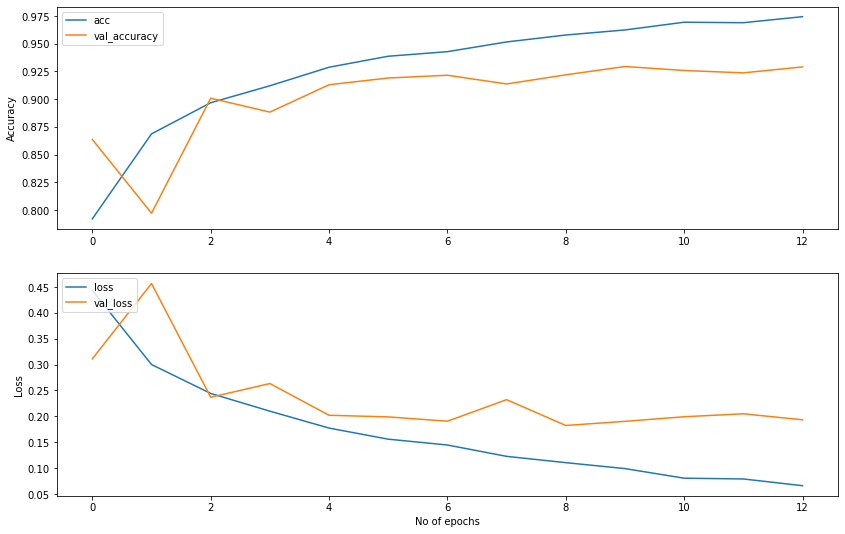

In [57]:
plot_loss_acc(history_finetune_gender,11,"keras_finetune_vgg_gender")

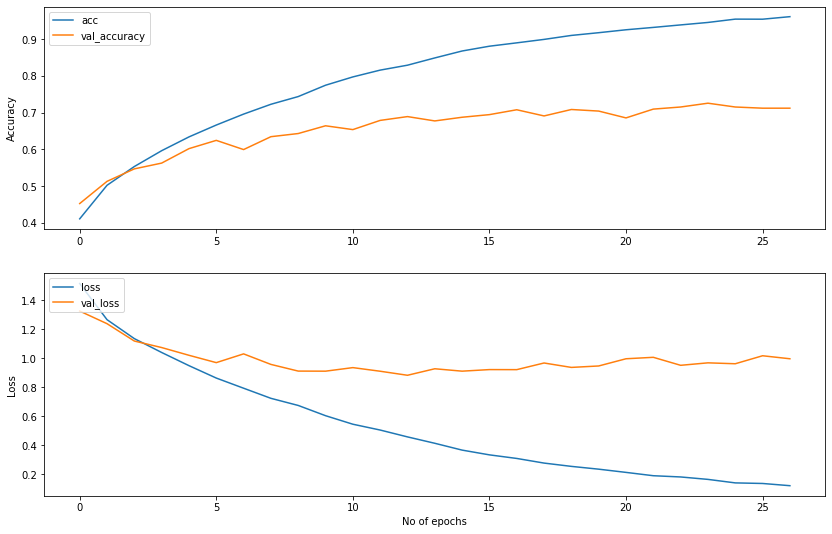

In [58]:
plot_loss_acc(history_finetune_age,11,"keras_finetune_vgg_age")

As we can see the model started to overfit around the 5th epoch

In [59]:
from sklearn import metrics

Evaluating the model on test set

In [60]:
final_model_gender.evaluate(test_generator_gender,verbose = 1)

110/110 [==============================] - 40s 361ms/step - loss: 0.1976 - accuracy: 0.9353


[0.19761697947978973, 0.9352620840072632]

Our model gave an accuracy of 93.53% on test set for the gender classification

In [61]:
gender_pred = final_model_gender.predict(test_generator_gender,verbose = 1)
gender_pred = [1 if g > 0.5 else 0 for g in gender_pred ]

110/110 [==============================] - 20s 176ms/step


A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

Confusion matrix
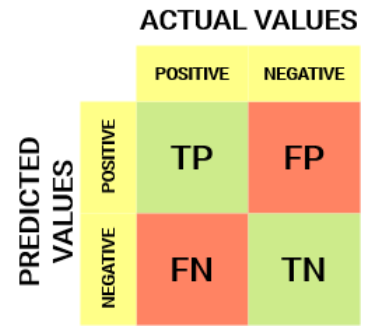
Let’s decipher the matrix:

The target variable has two values: Positive or Negative
The columns represent the actual values of the target variable
The rows represent the predicted values of the target variable

In [62]:
print(metrics.confusion_matrix(X_test['gender'], gender_pred))

[[1785   86]
 [ 140 1480]]


### Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

### Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

FN – False Negatives

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

### F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [63]:
print(metrics.classification_report(X_test['gender'], gender_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1871
           1       0.95      0.91      0.93      1620

    accuracy                           0.94      3491
   macro avg       0.94      0.93      0.93      3491
weighted avg       0.94      0.94      0.94      3491



In [64]:
final_model_age.evaluate(test_generator_age,verbose = 1)

110/110 [==============================] - 22s 196ms/step - loss: 0.9302 - accuracy: 0.7519


[0.9302229285240173, 0.7519335150718689]

Our model gave an accuracy of 75.19% on test set for the age classification

In [65]:
age_pred = final_model_age.predict(test_generator_age,verbose = 1)
age_pred = [str(p) for p in list(np.argmax(age_pred,axis=1))]

110/110 [==============================] - 20s 177ms/step


In [66]:
print(metrics.confusion_matrix(X_test['age'], age_pred, labels=['0','1','2','3','4','5','6','7']))

[[232  34   8   1   2   1   0   0]
 [ 41 337  49   4   5   5   2   0]
 [  5  25 383  12  25   5   3   0]
 [  0   5  26 256  59  18   3   0]
 [  0   9  42  67 854  95  12   5]
 [  2   1  15  15 103 364  15   7]
 [  0   2   9   7  29  29  99  10]
 [  0   0   2   0   3  24  25 100]]


In [67]:
print(metrics.classification_report(X_test['age'], age_pred, labels=['0','1','2','3','4','5','6','7']))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       278
           1       0.82      0.76      0.79       443
           2       0.72      0.84      0.77       458
           3       0.71      0.70      0.70       367
           4       0.79      0.79      0.79      1084
           5       0.67      0.70      0.68       522
           6       0.62      0.54      0.58       185
           7       0.82      0.65      0.72       154

    accuracy                           0.75      3491
   macro avg       0.75      0.72      0.73      3491
weighted avg       0.75      0.75      0.75      3491



## Example Prediction

In [68]:
tp = next(test_generator_gender)

Greater than 0.5 forms the condition for the image being of a male

In [69]:
pred = final_model_gender.predict(tp[0])[:5]
pred_age = final_model_age.predict(tp[0])[:5]
Output = []
Output_age = []
for p in pred:
    if p > 0.5:
        Output.append('male')
    else: 
        Output.append('female')
        
for p in pred_age:
    Output_age.append(list(age_to_label_map.keys())[list(age_to_label_map.values()).index(str(np.argmax(p)))])

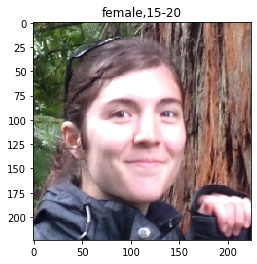

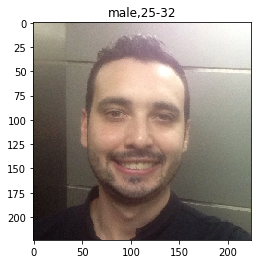

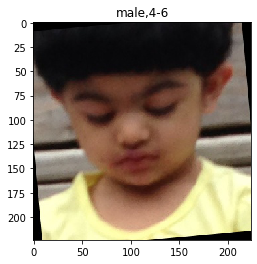

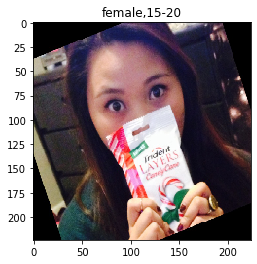

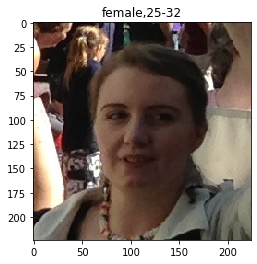

In [70]:
from matplotlib import pyplot as plt
for c in range(5):
    plt.imshow(tp[0][c], interpolation='nearest')
    plt.title(Output[c]+","+Output_age[c])
    plt.show()

## **Conclusion:**
1. In this tutorial, we implemented the gender and age detection  on the Adience Benchmark Gender and Age Classification dataset.
2. While exploring the data we found that there were some cases of unknown gender , so they were removed during preprocessing. We had total of 17000 images out of 80% was used in trainset and remaining test. Further 80:20 split was used for validation set
3. We first developed a CNN from scratch but its performnace wasnt satifactory as it gave accuracy of 74% for gender and 40% for age.
4. Hence we moved on for transfer learning as they are pretrained on a huge dataset and used VGG16
5. Proper transfer learning traing method were used and we infered from the training history object that:
*     The oscillations are due to Stochastic gradient since the weights are updated after each example
*     From the graph it's obvious that our model is learning because loss is decreasing and acc is increasing with time.
*     The model starts slightly to overfit apprxoimately after 5-6 epochs which is quite clear in loss curve where val loss starts increasing and training loss continues to decrease

6. We used the VGG16 model for both labels and obtained a considerable accuracy of 93.53% for gender and 75.19% for age.
7. Precision recall and f1 score for gender prediction were above 90 , showing higher values since it was binary classification
8. Possible Methods to improve accuracy
* more aggresive data augmentation
* more aggressive dropout
* use of L1 and L2 regularization (also known as "weight decay")


